In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaing and Preparation

## Data loading and basic inspection

In [ ]:
df = pd.read_csv("Cardiotocographic.csv")
print("Data loaded succesfully.")
print(f"Shape: {df.shape[0]} rows * {df.shape[1]} columns\n")
print("First 5 rows:")
display(df.head())
print("DataFrame info():")
print(df.info())

Data loaded succesfully.
Shape: 2126 rows * 14 columns

First 5 rows:


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


DataFrame info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None


# Data cleaing and Preparation

In [ ]:
print("Data Cleaning: ")
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print(f"Numeric columns: {num_cols}")
print(f"Categorical columns: {cat_cols}\n")

# Check missing values
print("Missing values per column BEFORE imputation:")
print(df.isna().sum(), "\n")

for col in cat_cols:
  try_numeric = pd.to_numeric(df[col], errors="coerce")

  if try_numeric.notna().sum() > 0.8 * len(df):
            print(f"Converting column '{col}' from object to numeric based on values.")
            df[col] = try_numeric

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

for col in cat_cols:
    if df[col].isna().any():
      mode_val = df[col].mode(dropna=True)
      if not mode_val.empty:
       df[col].fillna(mode_val[0], inplace=True)

print("Missing values per column AFTER imputation:")
print(df.isna().sum(),"\n")

Data Cleaning: 
Numeric columns: ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']
Categorical columns: []

Missing values per column BEFORE imputation:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64 

Missing values per column AFTER imputation:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64 



/tmp/ipython-input-2508767154.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [ ]:
#Detecting Outliers:
factor = 1.5
print("Outlier detection: ")
outlier_flags = pd.DataFrame(index=df.index)
for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        mask = (df[col] < lower) | (df[col] > upper)
        outlier_flags[col + "_outlier"] = mask
        print(f"{col}: {mask.sum()} outliers (IQR={IQR:.3f}, lower={lower:.3f}, upper={upper:.3f})")
total_outlier_rows = outlier_flags.any(axis=1).sum()
print(f"\nTotal rows with at least one outlier: {total_outlier_rows}\n")



Outlier detection: 
LB: 10 outliers (IQR=14.000, lower=105.000, upper=161.000)
AC: 43 outliers (IQR=0.006, lower=-0.008, upper=0.014)
FM: 347 outliers (IQR=0.003, lower=-0.004, upper=0.006)
UC: 13 outliers (IQR=0.005, lower=-0.005, upper=0.014)
DL: 125 outliers (IQR=0.003, lower=-0.005, upper=0.008)
DS: 120 outliers (IQR=0.000, lower=0.000, upper=0.000)
DP: 284 outliers (IQR=0.000, lower=0.000, upper=0.000)
ASTV: 10 outliers (IQR=29.000, lower=-11.500, upper=104.500)
MSTV: 80 outliers (IQR=1.000, lower=-0.800, upper=3.200)
ALTV: 318 outliers (IQR=11.000, lower=-16.500, upper=27.500)
MLTV: 81 outliers (IQR=6.200, lower=-4.700, upper=20.100)
Width: 10 outliers (IQR=63.000, lower=-57.500, upper=194.500)
Tendency: 10 outliers (IQR=1.000, lower=-1.500, upper=2.500)
NSP: 559 outliers (IQR=0.000, lower=1.000, upper=1.000)

Total rows with at least one outlier: 1230



# Statistical summary

In [ ]:
print("Statistical summary:")
desc = df[num_cols].describe()
print("describe():")
print(desc, "\n")

medians = df[num_cols].median()
print("Median values:")
print(medians, "\n")

# IQR per column
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR):")
print(IQR, "\n")

# Simple interpretation hints
print("Interpretation hints:")
print("- Compare mean vs median for skewness.")
print("- Large std or IQR indicates high variability in that feature.\n")

Statistical summary:
describe():
                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.340204     0.003204     0.009894     0.004391     0.001895   
std      11.214379     0.004373     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000002     0.000173    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min 

# Visualizations

VISUALIZATIONS DISTRIBUTIONS: 


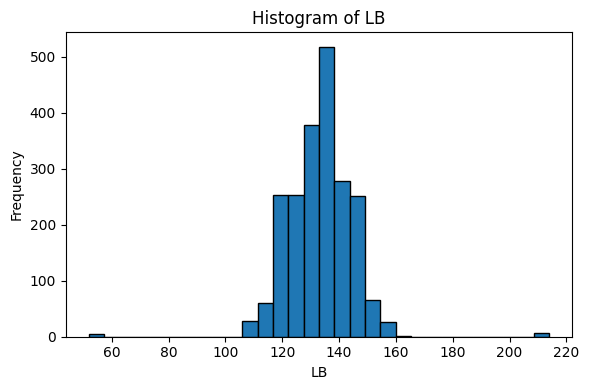

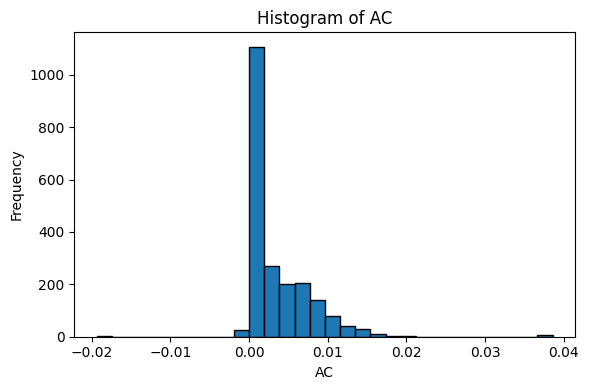

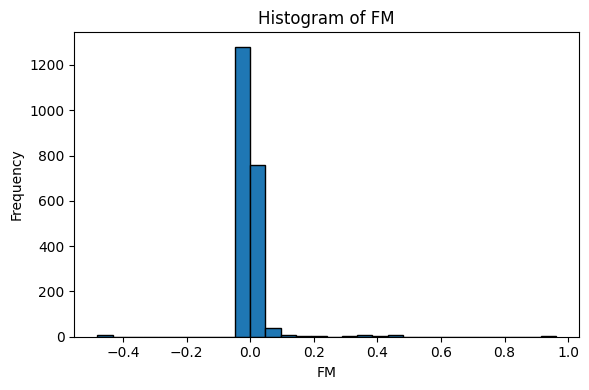

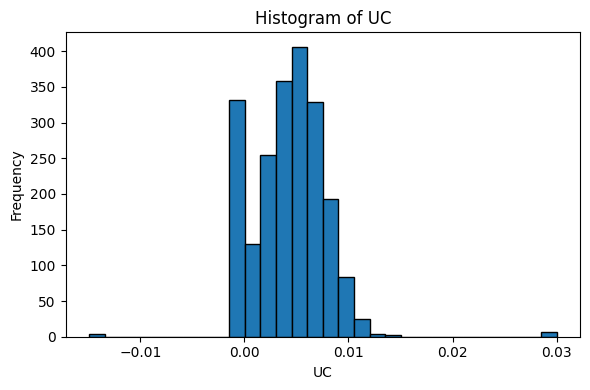

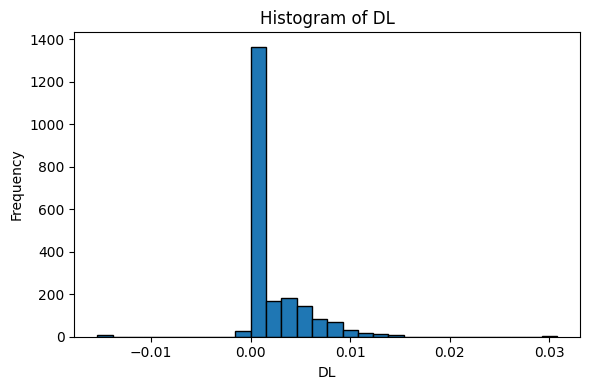

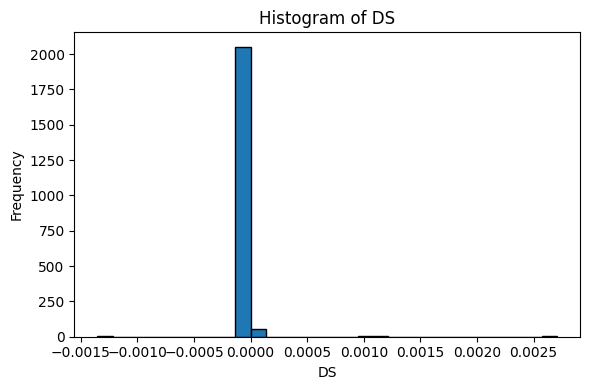

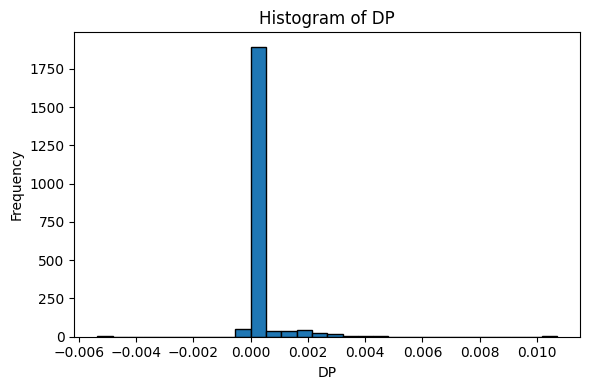

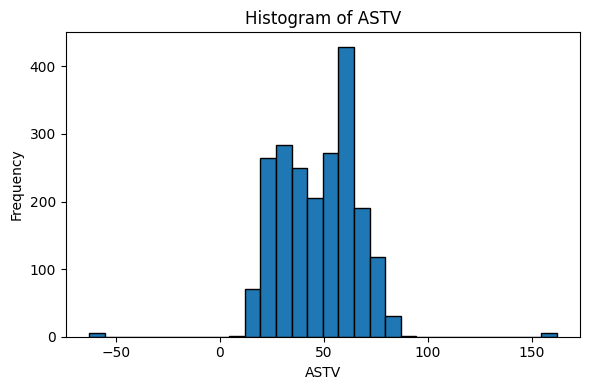

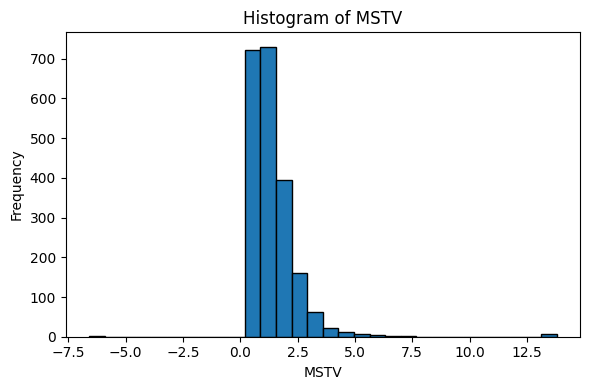

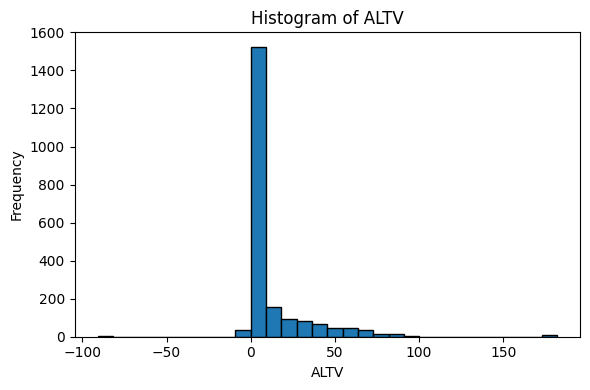

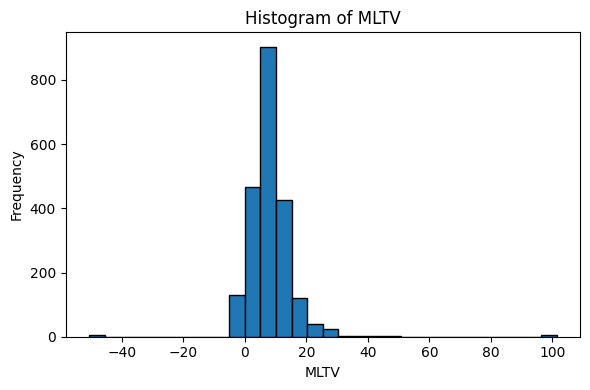

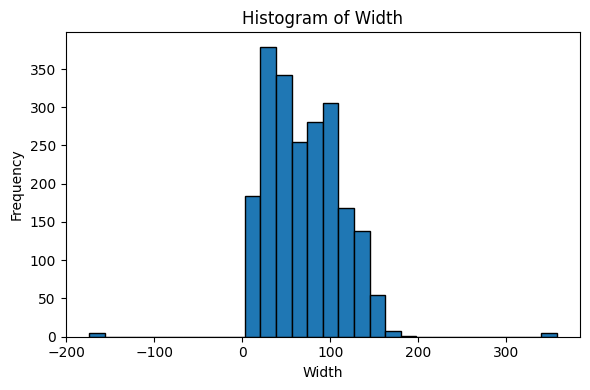

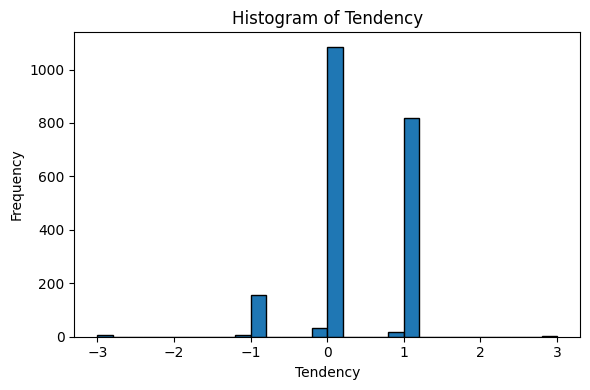

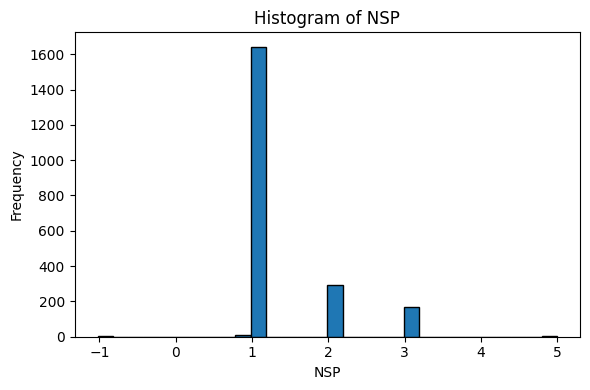

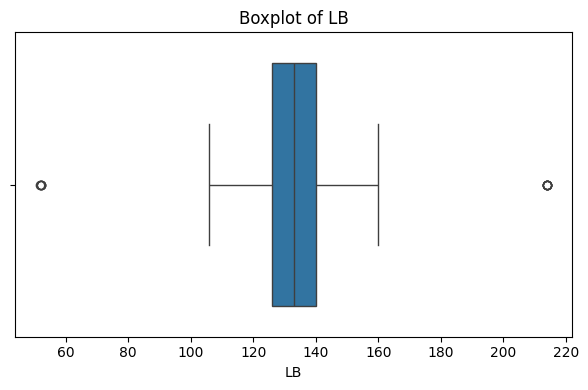

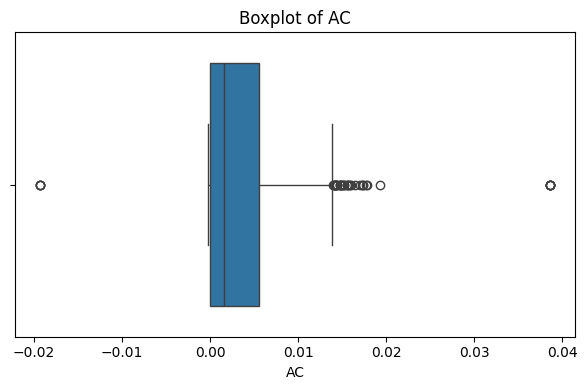

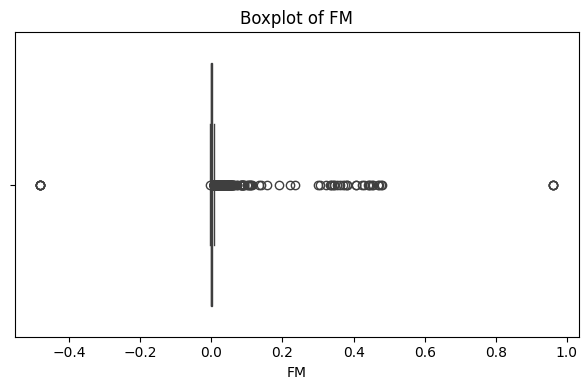

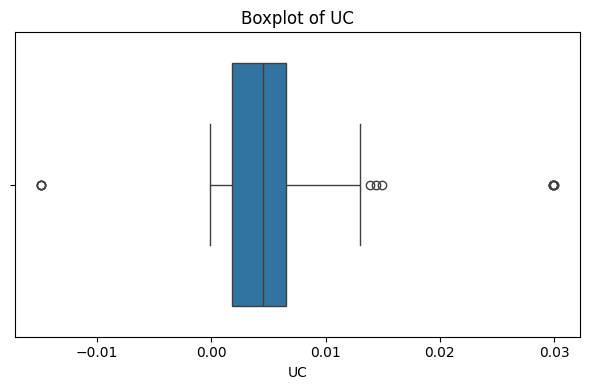

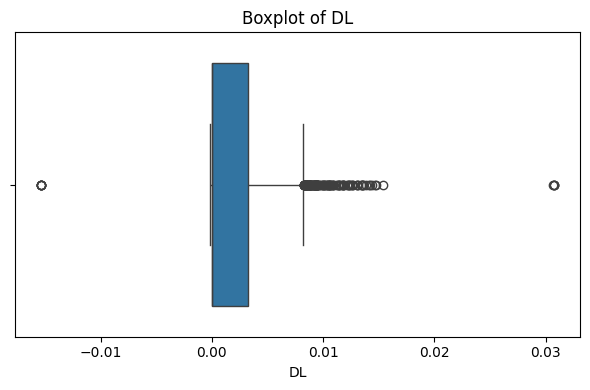

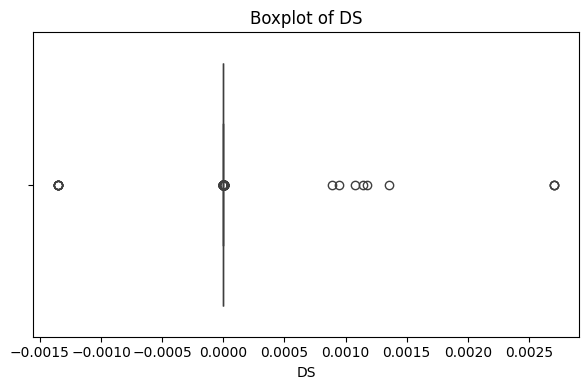

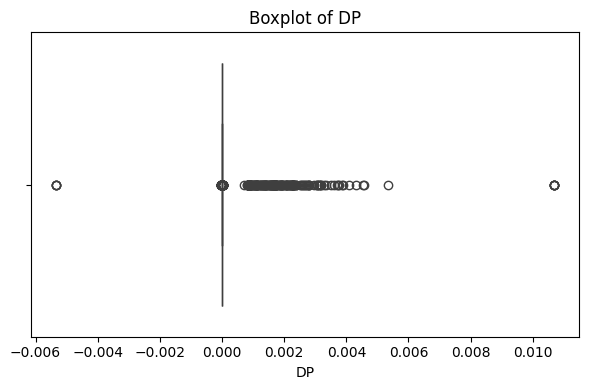

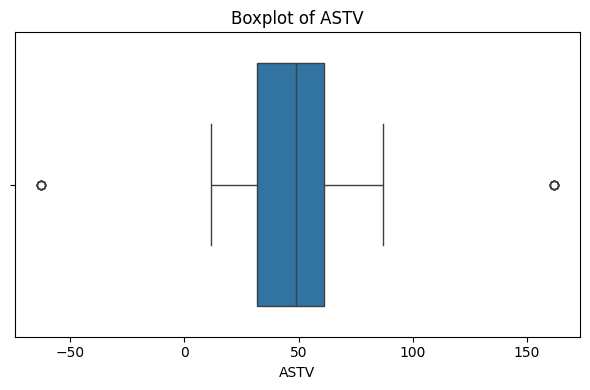

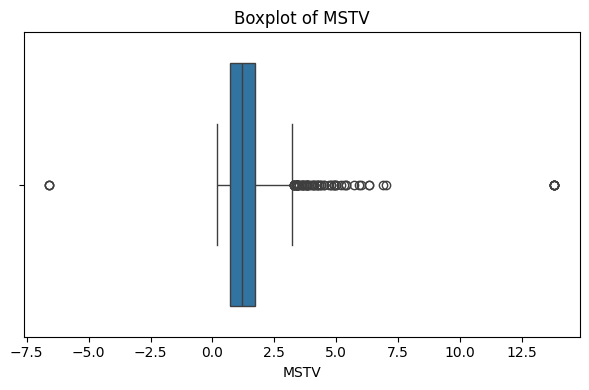

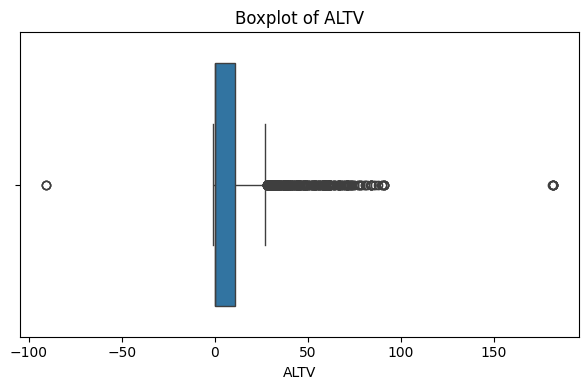

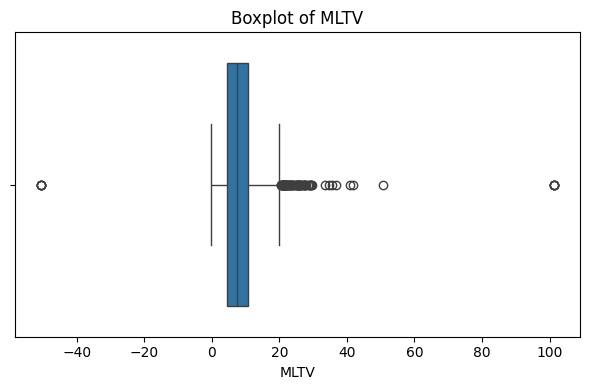

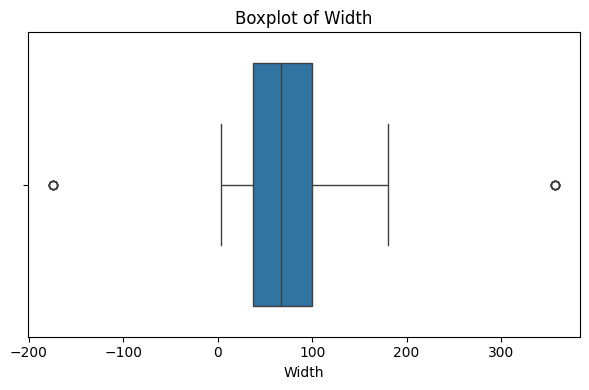

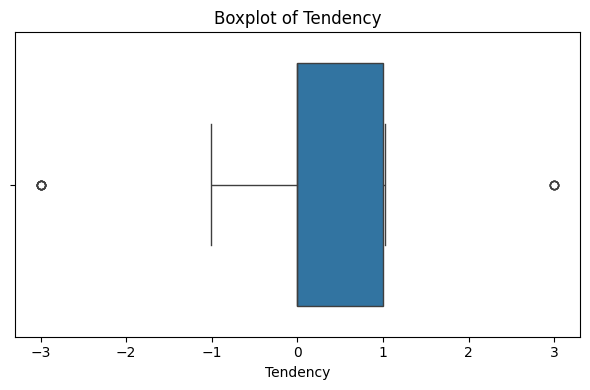

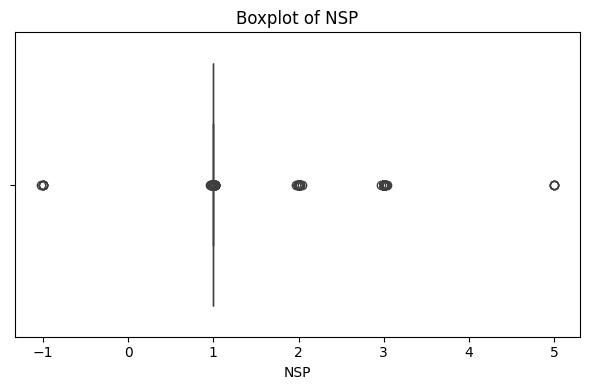

In [ ]:
print("VISUALIZATIONS DISTRIBUTIONS: ")
# Histograms
for col in num_cols:
        plt.figure(figsize=(6, 4))
        plt.hist(df[col], bins=30, edgecolor="black")
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

# Boxplots
for col in num_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

# Bar charts for categorical variables
for col in cat_cols:
        plt.figure(figsize=(6, 4))
        counts = df[col].value_counts()
        sns.barplot(x=counts.index, y=counts.values)
        plt.title(f"Bar Chart of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Pie chart for categorical variables
        plt.figure(figsize=(5, 5))
        counts.plot(kind="pie", autopct="%1.1f%%")
        plt.title(f"Pie Chart of {col}")
        plt.ylabel("")
        plt.tight_layout()
        plt.show()

VISUALIZATIONS: RELATIONSHIPS


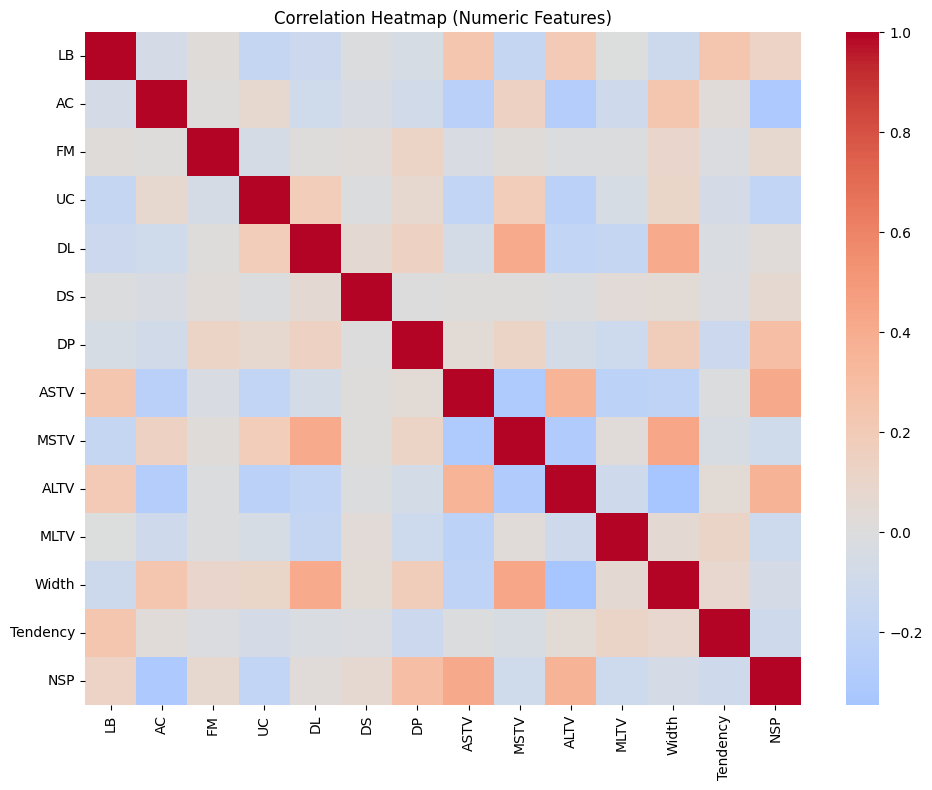

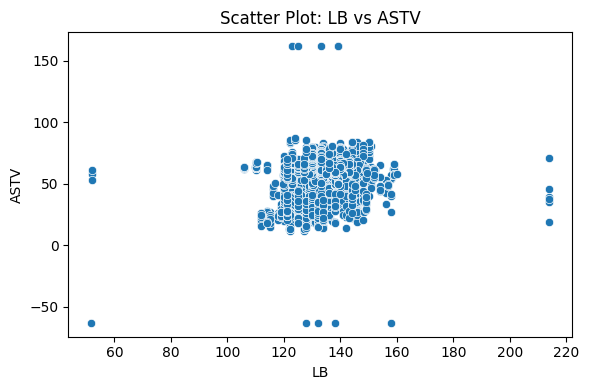

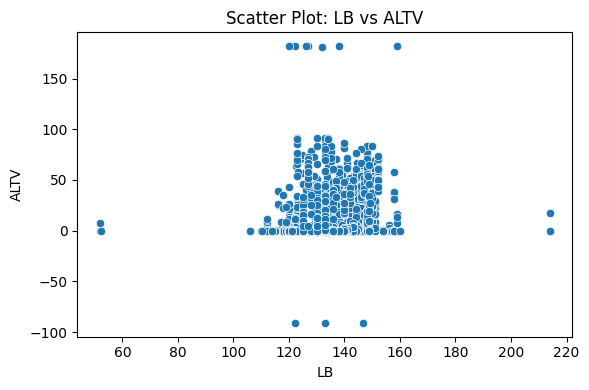

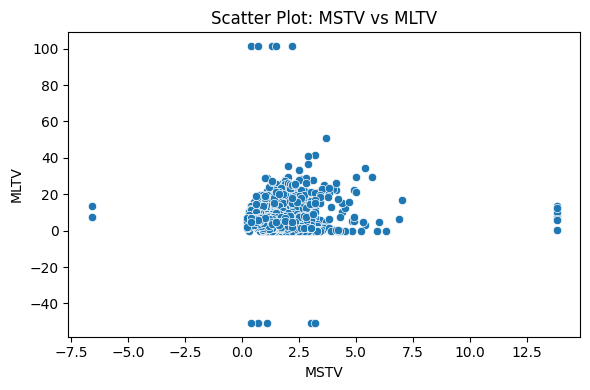

Creating pairplot for columns: ['LB', 'AC', 'FM', 'UC', 'DL', 'DS']


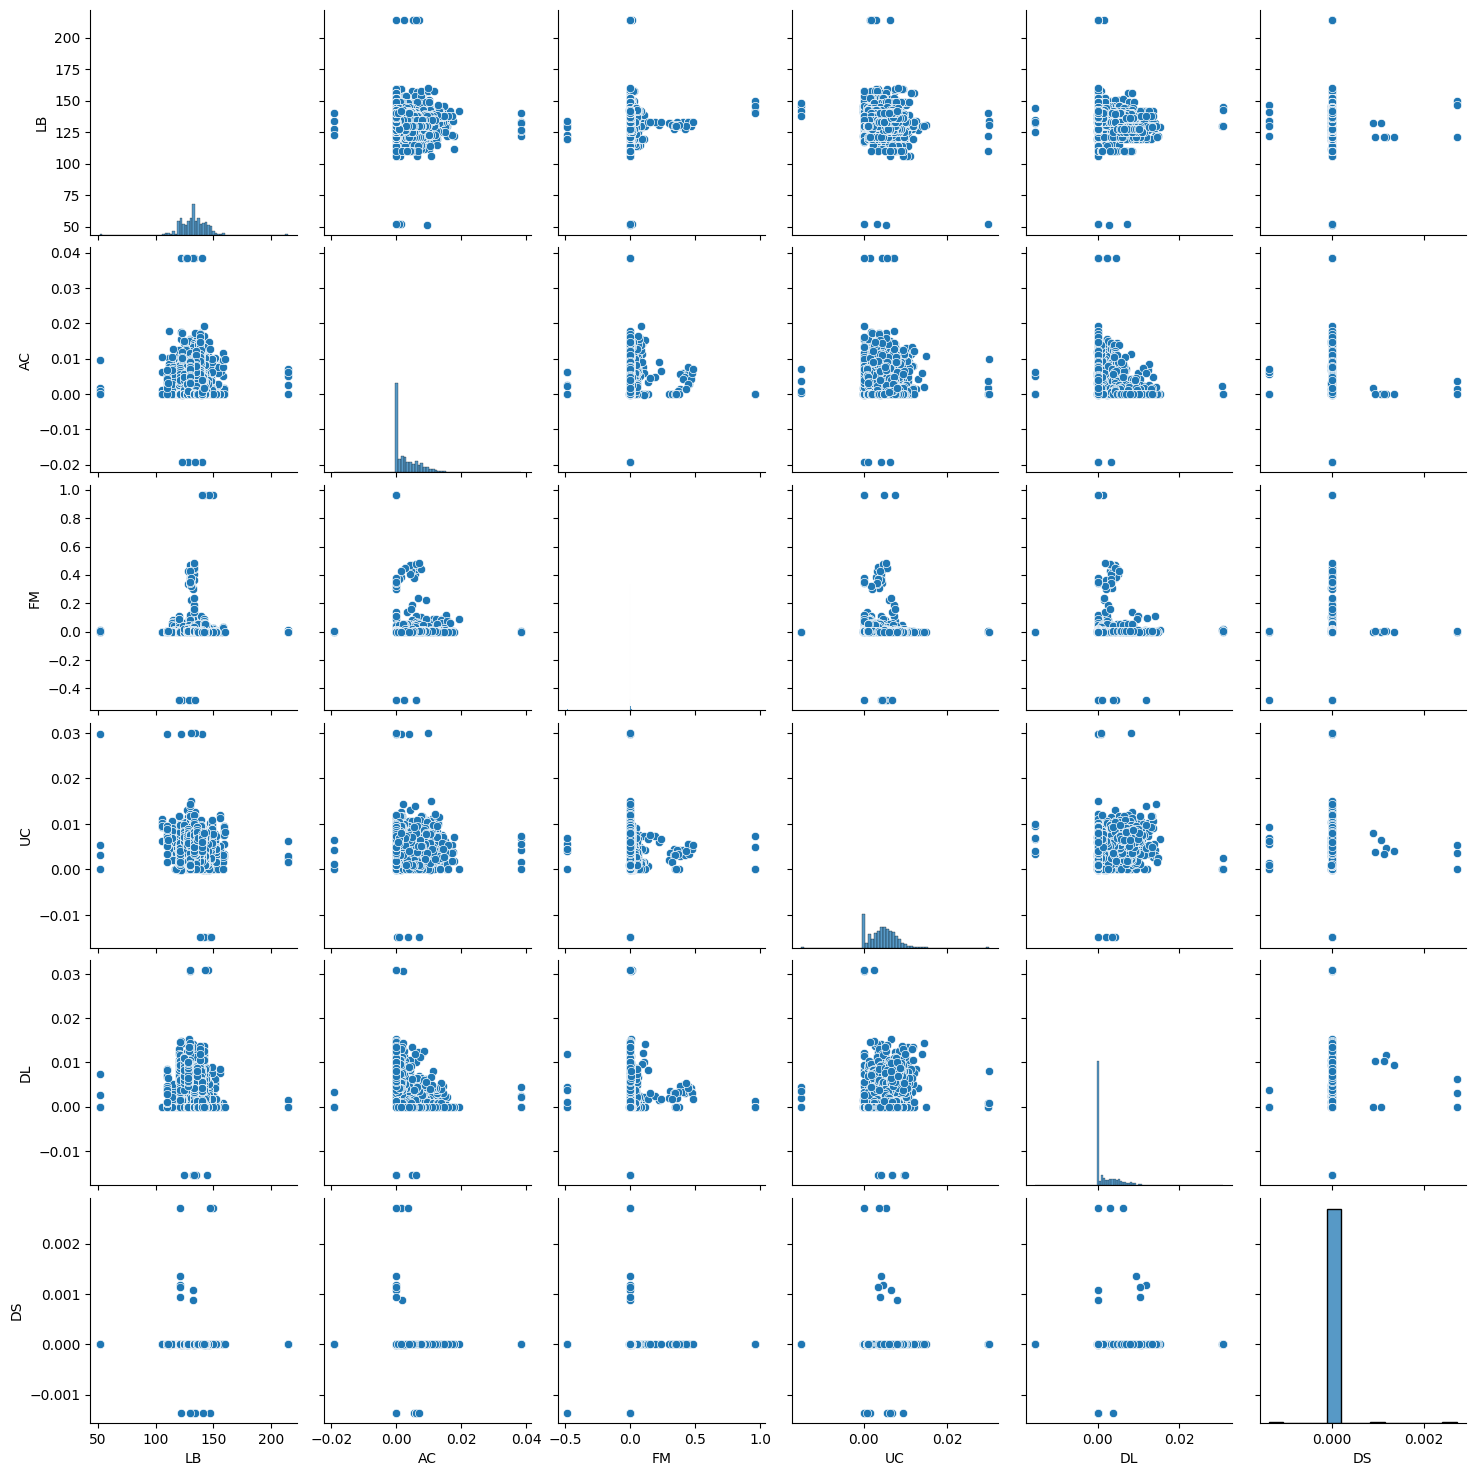

Creating violin plots by target column: NSP


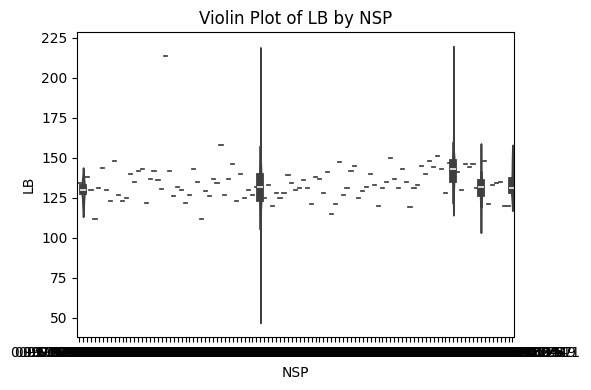

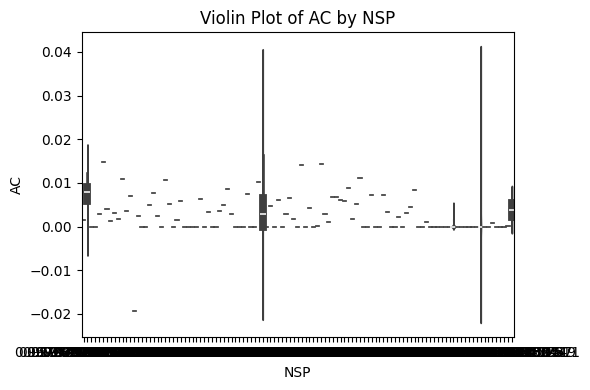

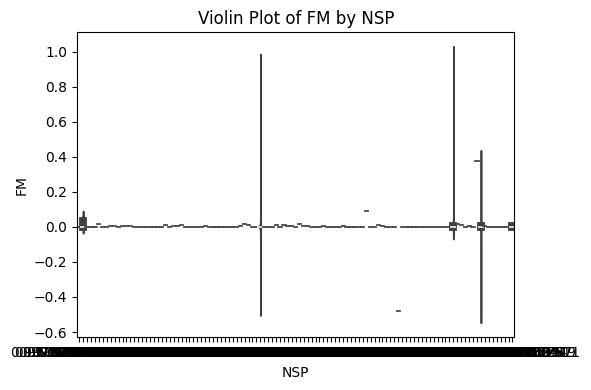

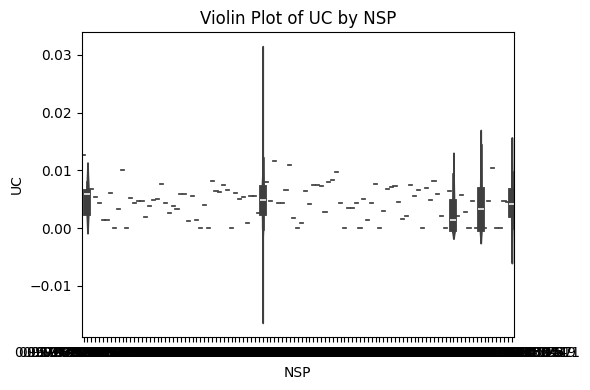

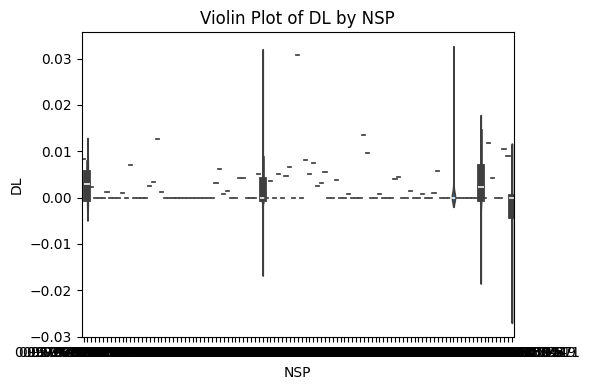

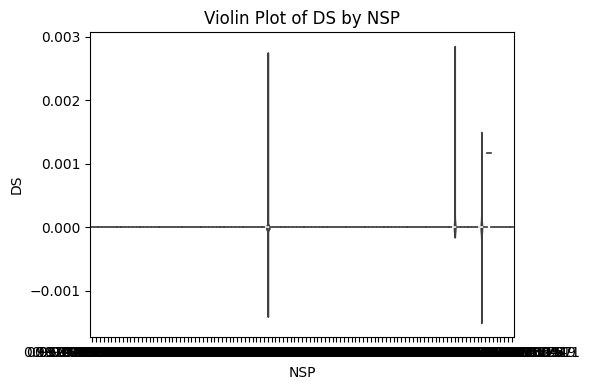

In [ ]:
print("VISUALIZATIONS: RELATIONSHIPS")
# Correlation heatmap for numeric columns
if len(num_cols) > 1:
        plt.figure(figsize=(10, 8))
        corr = df[num_cols].corr()
        sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
        plt.title("Correlation Heatmap (Numeric Features)")
        plt.tight_layout()
        plt.show()

# Scatter plots between selected pairs
potential_pairs = [
        ("LB", "ASTV"),
        ("LB", "ALTV"),
        ("MSTV", "MLTV")
    ]
for x, y in potential_pairs:
        if x in df.columns and y in df.columns:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[x], y=df[y])
            plt.title(f"Scatter Plot: {x} vs {y}")
            plt.tight_layout()
            plt.show()

# Pairplot for a subset of numeric columns
subset = num_cols[:6]
if len(subset) > 1:
        print(f"Creating pairplot for columns: {subset}")
        sns.pairplot(df[subset])
        plt.show()

# Violin plots:
target_col = None
for candidate in ["NSP", "class", "target"]:
        if candidate in df.columns:
            target_col = candidate
            break

if target_col is not None:
        print(f"Creating violin plots by target column: {target_col}")
        for col in num_cols[:6]:
            plt.figure(figsize=(6, 4))
            sns.violinplot(x=df[target_col], y=df[col])
            plt.title(f"Violin Plot of {col} by {target_col}")
            plt.tight_layout()
            plt.show()
else:
        print("No obvious target column (e.g., 'NSP') found for violin plots. Skipping.")

# Pattern recognition

In [ ]:
corr = df[num_cols].corr()

# Showing top 5 strongest absolute correlations (excluding self-correlation)
corr_unstacked = (
        corr.where(~np.eye(corr.shape[0], dtype=bool))
            .unstack()
            .dropna()
    )
corr_sorted = corr_unstacked.reindex(corr_unstacked.abs().sort_values(ascending=False).index)
top5 = corr_sorted.head(5)
print("Top 5 strongest correlations between numeric variables:")
print(top5, "\n")

print("Interpretation suggestions:")
print("- High positive correlation: variables move together (e.g., if ASTV ↑ then ALTV may also ↑).")
print("- High negative correlation: when one variable increases, the other tends to decrease.")
print("- For fetal monitoring, patterns in variability (ASTV, MSTV, ALTV, MLTV) can indicate fetal well-being or distress.")
print("- You can relate these patterns back to medical meaning in your written report.\n")

Top 5 strongest correlations between numeric variables:
Width  MSTV     0.432822
MSTV   Width    0.432822
ASTV   NSP      0.420873
NSP    ASTV     0.420873
MSTV   DL       0.410102
dtype: float64 

Interpretation suggestions:
- High positive correlation: variables move together (e.g., if ASTV ↑ then ALTV may also ↑).
- High negative correlation: when one variable increases, the other tends to decrease.
- For fetal monitoring, patterns in variability (ASTV, MSTV, ALTV, MLTV) can indicate fetal well-being or distress.
- You can relate these patterns back to medical meaning in your written report.

